In [1]:
#Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#Import the data
train_data = pd.read_csv("train.csv")

## **Examining the Data**

In [3]:
train_data.head(25)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1


In [4]:
train_data.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [5]:
train_data.shape

(19104, 13)

In [6]:
#target variable of training data
target = train_data[['Emp_ID','LastWorkingDate']]

In [7]:
target = target.dropna(subset = ['LastWorkingDate'])

In [8]:
target.shape

(1616, 2)

In [9]:
target.head()

,Emp_ID,LastWorkingDate
2,1,2016-03-11
9,4,2017-04-27
12,5,2016-03-07
20,8,2017-11-15
27,12,2016-12-21


In [10]:
train_data["Month_yr"] = pd.to_datetime(train_data['MMM-YY'],errors = 'coerce')

In [11]:
train_data['Age'].isna().sum()

0

## **Feature Engineering** 

In [12]:
age = train_data.groupby('Emp_ID')['Age'].max().reset_index()

In [13]:
age.head()

,Emp_ID,Age
0,1,28
1,2,31
2,4,43
3,5,29
4,6,31


In [14]:
df_train = train_data.sort_values(['Emp_ID',"Month_yr"],ascending=False)

In [15]:
df_train.isna().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
Month_yr                    0
dtype: int64

In [16]:
df_train['months_before_Leaving']=df_train.groupby('Emp_ID').cumcount()+ 1

In [17]:
total_business = df_train.groupby('Emp_ID').agg({'Total Business Value': ['min', 'max','mean','median','sum'], 'Quarterly Rating': ['min','max'],'Salary':['min','max']}).reset_index()

In [18]:
total_business.head(5)

Emp_ID Total Business Value                                        \
                          min      max         mean median      sum   
0      1              -665480  2381060 571860.00000      0  1715580   
1      2                    0        0      0.00000      0        0   
2      4                    0   350000  70000.00000      0   350000   
3      5                    0   120360  40120.00000      0   120360   
4      6                    0  1265000 253000.00000      0  1265000   

  Quarterly Rating     Salary         
               min max    min    max  
0                2   2  57387  57387  
1                1   1  67016  67016  
2                1   1  65603  65603  
3                1   1  46368  46368  
4                1   2  78728  78728

In [19]:
df_train.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Month_yr,months_before_Leaving
19103,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2,2017-12-01,1
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,2017-11-01,2
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,2017-10-01,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,2017-09-01,4
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,2017-08-01,5
19098,2017-07-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,497690,3,2017-07-01,6
19097,2017-06-01,2788,29,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,1,2017-06-01,7
19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1,2016-06-01,1
19095,2016-05-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,0,1,2016-05-01,2
19094,2016-04-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,0,1,2016-04-01,3


In [20]:
df_train['Month_yr'].max()

Timestamp('2017-12-01 00:00:00')

In [21]:
df_train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Month_yr',
       'months_before_Leaving'],
      dtype='object')

In [22]:
pivoted = df_train.pivot(index='Emp_ID',  columns='months_before_Leaving',values=['Total Business Value']).reset_index()

In [23]:
pivoted

Emp_ID Total Business Value                              \
months_before_Leaving                           1             2             3   
0                          1              0.00000 -665480.00000 2381060.00000   
1                          2              0.00000       0.00000           NaN   
2                          4              0.00000  350000.00000       0.00000   
3                          5              0.00000  120360.00000       0.00000   
4                          6              0.00000 1265000.00000       0.00000   
...                      ...                  ...           ...           ...   
2376                    2784         505480.00000       0.00000 3087830.00000   
2377                    2785              0.00000       0.00000       0.00000   
2378                    2786              0.00000       0.00000  318460.00000   
2379                    2787              0.00000       0.00000       0.00000   
2380                    2788         411480.00000  200420.00000       0.00000   

                                                                            \
months_before_Leaving            4             5            6            7   
0                              NaN           NaN          NaN          NaN   
1                              NaN           NaN          NaN          NaN   
2                          0.00000       0.00000          NaN          NaN   
3                              NaN           NaN          NaN          NaN   
4                          0.00000       0.00000          NaN          NaN   
...                            ...           ...          ...          ...   
2376                  400000.00000 1260090.00000 252000.00000 979270.00000   
2377                           NaN           NaN          NaN          NaN   
2378                       0.00000  387660.00000 432240.00000 970380.00000   
2379                  319740.00000  250000.00000 408090.00000          NaN   
2380                  448370.00000  740280.00000 497690.00000      0.00000   

                                                 ...               \
months_before_Leaving            8            9  ...           15   
0                              NaN          NaN  ...          NaN   
1                              NaN          NaN  ...          NaN   
2                              NaN          NaN  ...          NaN   
3                              NaN          NaN  ...          NaN   
4                              NaN          NaN  ...          NaN   
...                            ...          ...  ...          ...   
2376                  153800.00000 150260.00000  ... 990000.00000   
2377                           NaN          NaN  ...          NaN   
2378                  485270.00000 221080.00000  ...          NaN   
2379                           NaN          NaN  ...          NaN   
2380                           NaN          NaN  ...          NaN   

                                                                      \
months_before_Leaving           16           17           18      19   
0                              NaN          NaN          NaN     NaN   
1                              NaN          NaN          NaN     NaN   
2                              NaN          NaN          NaN     NaN   
3                              NaN          NaN          NaN     NaN   
4                              NaN          NaN          NaN     NaN   
...                            ...          ...          ...     ...   
2376                  271380.00000 270710.00000 102770.00000 0.00000   
2377                           NaN          NaN          NaN     NaN   
2378                           NaN          NaN          NaN     NaN   
2379                           NaN          NaN          NaN     NaN   
2380                           NaN          NaN          NaN     NaN   

                                                                            \
months_before_Leaving           20      

In [24]:
pivoted.columns

MultiIndex([(              'Emp_ID', ''),
            ('Total Business Value',  1),
            ('Total Business Value',  2),
            ('Total Business Value',  3),
            ('Total Business Value',  4),
            ('Total Business Value',  5),
            ('Total Business Value',  6),
            ('Total Business Value',  7),
            ('Total Business Value',  8),
            ('Total Business Value',  9),
            ('Total Business Value', 10),
            ('Total Business Value', 11),
            ('Total Business Value', 12),
            ('Total Business Value', 13),
            ('Total Business Value', 14),
            ('Total Business Value', 15),
            ('Total Business Value', 16),
            ('Total Business Value', 17),
            ('Total Business Value', 18),
            ('Total Business Value', 19),
            ('Total Business Value', 20),
            ('Total Business Value', 21),
            ('Total Business Value', 22),
            ('Total Business Value

In [25]:
pivoted.columns=[     'Emp_ID',
            'Total Business Value_ 1',
            'Total Business Value_ 2',
            'Total Business Value_ 3',
            'Total Business Value_ 4',
            'Total Business Value_ 5',
            'Total Business Value_ 6',
            'Total Business Value_ 7',
            'Total Business Value_ 8',
            'Total Business Value_ 9',
            'Total Business Value_10',
            'Total Business Value_11',
            'Total Business Value_12',
            'Total Business Value_13',
            'Total Business Value_14',
            'Total Business Value_15',
            'Total Business Value_16',
            'Total Business Value_17',
            'Total Business Value_18',
            'Total Business Value_19',
            'Total Business Value_20',
            'Total Business Value_21',
            'Total Business Value_22',
            'Total Business Value_23',
            'Total Business Value_24']

In [26]:
pivoted[['Emp_ID','Total Business Value_ 1',
            'Total Business Value_ 2',
            'Total Business Value_ 3',
            'Total Business Value_ 4',
            'Total Business Value_ 5',
            'Total Business Value_ 6']].isna().sum()

Emp_ID                        0
Total Business Value_ 1       0
Total Business Value_ 2     181
Total Business Value_ 3     384
Total Business Value_ 4     647
Total Business Value_ 5     892
Total Business Value_ 6    1201
dtype: int64

In [27]:
df_train['Total Business Value'].describe()

count      19104.00000
mean      571662.07496
std      1128312.21846
min     -6000000.00000
25%            0.00000
50%       250000.00000
75%       699700.00000
max     33747720.00000
Name: Total Business Value, dtype: float64

In [28]:
pivoted_new = pivoted[['Emp_ID','Total Business Value_ 1',
            'Total Business Value_ 2',
            'Total Business Value_ 3',
            'Total Business Value_ 4']]

In [29]:
pivoted_new = pivoted_new.fillna(0)

In [30]:
pivoted_new['change_m1_2']=pivoted['Total Business Value_ 2']-pivoted['Total Business Value_ 1']
pivoted_new['change_m2_3']=pivoted['Total Business Value_ 3']-pivoted['Total Business Value_ 2']
pivoted_new['change_m3_4']=pivoted['Total Business Value_ 4']-pivoted['Total Business Value_ 3']

In [31]:
pivoted.shape

(2381, 25)

In [32]:
age.shape

(2381, 2)

In [33]:
merged_1 = pd.merge(pivoted_new,age, on='Emp_ID', how = 'inner')

In [34]:
merged_2 = pd.merge(merged_1,target, on ='Emp_ID', how='left')

In [35]:
merged_2.shape

(2381, 10)

In [36]:
merged_2.head()

,Emp_ID,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,Total Business Value_ 4,change_m1_2,change_m2_3,change_m3_4,Age,LastWorkingDate
0,1,0.00000,-665480.00000,2381060.00000,0.00000,-665480.00000,3046540.00000,NaN,28,2016-03-11
1,2,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,31,NaN
2,4,0.00000,350000.00000,0.00000,0.00000,350000.00000,-350000.00000,0.00000,43,2017-04-27
3,5,0.00000,120360.00000,0.00000,0.00000,120360.00000,-120360.00000,NaN,29,2016-03-07
4,6,0.00000,1265000.00000,0.00000,0.00000,1265000.00000,-1265000.00000,0.00000,31,NaN


In [37]:
merged_2.columns

Index(['Emp_ID', 'Total Business Value_ 1', 'Total Business Value_ 2',
       'Total Business Value_ 3', 'Total Business Value_ 4', 'change_m1_2',
       'change_m2_3', 'change_m3_4', 'Age', 'LastWorkingDate'],
      dtype='object')

In [38]:
merged_2['Left'] = np.where(pd.isna(merged_2['LastWorkingDate']),0,1)

In [39]:
merged_2.head()

,Emp_ID,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,Total Business Value_ 4,change_m1_2,change_m2_3,change_m3_4,Age,LastWorkingDate,Left
0,1,0.00000,-665480.00000,2381060.00000,0.00000,-665480.00000,3046540.00000,NaN,28,2016-03-11,1
1,2,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,31,NaN,0
2,4,0.00000,350000.00000,0.00000,0.00000,350000.00000,-350000.00000,0.00000,43,2017-04-27,1
3,5,0.00000,120360.00000,0.00000,0.00000,120360.00000,-120360.00000,NaN,29,2016-03-07,1
4,6,0.00000,1265000.00000,0.00000,0.00000,1265000.00000,-1265000.00000,0.00000,31,NaN,0


In [40]:
merged_2.dtypes

Emp_ID                       int64
Total Business Value_ 1    float64
Total Business Value_ 2    float64
Total Business Value_ 3    float64
Total Business Value_ 4    float64
change_m1_2                float64
change_m2_3                float64
change_m3_4                float64
Age                          int64
LastWorkingDate             object
Left                         int32
dtype: object

In [41]:
merged_2.shape

(2381, 11)

In [42]:
df_train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Month_yr',
       'months_before_Leaving'],
      dtype='object')

In [43]:
abc = df_train[['Emp_ID', 'Gender', 'City', 'Education_Level',
       'Dateofjoining','Joining Designation',
       'Designation']].drop_duplicates(subset='Emp_ID')

In [44]:
abc.shape

(2381, 7)

In [45]:
merged_2 = pd.merge(abc,merged_2,on='Emp_ID', how= 'inner')

In [46]:
merged_2.shape

(2381, 17)

In [47]:
merged_2['Dateofjoining']= pd.to_datetime(merged_2['Dateofjoining'],errors='coerce')

In [48]:
max_date = pd.to_datetime('2018-01-01',errors='coerce')

In [49]:
merged_2['LWD'] = np.where(pd.isna(merged_2['LastWorkingDate']),max_date,merged_2['LastWorkingDate'])

In [50]:
merged_2.dtypes

Emp_ID                              int64
Gender                             object
City                               object
Education_Level                    object
Dateofjoining              datetime64[ns]
Joining Designation                 int64
Designation                         int64
Total Business Value_ 1           float64
Total Business Value_ 2           float64
Total Business Value_ 3           float64
Total Business Value_ 4           float64
change_m1_2                       float64
change_m2_3                       float64
change_m3_4                       float64
Age                                 int64
LastWorkingDate                    object
Left                                int32
LWD                        datetime64[ns]
dtype: object

In [51]:
merged_2['tenure'] = (merged_2['LWD'] - merged_2['Dateofjoining'])/np.timedelta64(1, 'M')

In [52]:
merged_2.isna().sum().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 384,
       647,   0, 765,   0,   0,   0], dtype=int64)

In [53]:
merged_2.shape

(2381, 19)

In [54]:
merged_2

,Emp_ID,Gender,City,Education_Level,Dateofjoining,Joining Designation,Designation,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,Total Business Value_ 4,change_m1_2,change_m2_3,change_m3_4,Age,LastWorkingDate,Left,LWD,tenure
0,2788,Male,C27,Master,2017-06-08,2,2,411480.00000,200420.00000,0.00000,448370.00000,-211060.00000,-200420.00000,448370.00000,30,NaN,0,2018-01-01,6.80096
1,2787,Female,C20,Master,2015-07-21,1,1,0.00000,0.00000,0.00000,319740.00000,0.00000,0.00000,319740.00000,28,2016-06-20,1,2016-06-20,11.00639
2,2786,Male,C19,College,2015-07-31,2,2,0.00000,0.00000,318460.00000,0.00000,0.00000,318460.00000,-318460.00000,45,2016-09-22,1,2016-09-22,13.76620
3,2785,Female,C9,College,2017-08-28,1,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,34,2017-10-28,1,2017-10-28,2.00415
4,2784,Male,C24,College,2012-10-15,2,3,505480.00000,0.00000,3087830.00000,400000.00000,-505480.00000,3087830.00000,-2687830.00000,34,NaN,0,2018-01-01,62.55570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,6,Female,C11,Bachelor,2017-07-31,3,3,0.00000,1265000.00000,0.00000,0.00000,1265000.00000,-1265000.00000,0.00000,31,NaN,0,2018-01-01,5.05965
2377,5,Male,C9,College,2016-01-09,1,1,0.00000,120360.00000,0.00000,0.00000,120360.00000,-120360.00000,NaN,29,2016-03-07,1,2016-03-07,1.90558
2378,4,Male,C13,Master,2016-12-07,2,2,0.00000,350000.00000,0.00000,0.00000,350000.00000,-350000.00000,0.00000,43,2017-04-27,1,2017-04-27,4.63254
2379,2,Male,C7,Master,2017-11-06,2,2,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,31,NaN,0,2018-01-01,1.83987


In [55]:
merged_2['LWD']

0      2018-01-01
1      2016-06-20
2      2016-09-22
3      2017-10-28
4      2018-01-01
          ...    
2376   2018-01-01
2377   2016-03-07
2378   2017-04-27
2379   2018-01-01
2380   2016-03-11
Name: LWD, Length: 2381, dtype: datetime64[ns]

### **Transforming Date and Time**

In [56]:
import datetime

In [57]:
merged_2['day_of_year'] = merged_2.LWD.dt.dayofyear
merged_2['day'] = merged_2.LWD.dt.day
merged_2['month'] = merged_2.LWD.dt.month
#M2['year'] = M2.LWD.dt.year
merged_2['quarter'] = merged_2.LWD.dt.quarter
merged_2.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,Joining Designation,Designation,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,...,change_m3_4,Age,LastWorkingDate,Left,LWD,tenure,day_of_year,day,month,quarter
0,2788,Male,C27,Master,2017-06-08,2,2,411480.00000,200420.00000,0.00000,...,448370.00000,30,NaN,0,2018-01-01,6.80096,1,1,1,1
1,2787,Female,C20,Master,2015-07-21,1,1,0.00000,0.00000,0.00000,...,319740.00000,28,2016-06-20,1,2016-06-20,11.00639,172,20,6,2
2,2786,Male,C19,College,2015-07-31,2,2,0.00000,0.00000,318460.00000,...,-318460.00000,45,2016-09-22,1,2016-09-22,13.76620,266,22,9,3
3,2785,Female,C9,College,2017-08-28,1,1,0.00000,0.00000,0.00000,...,NaN,34,2017-10-28,1,2017-10-28,2.00415,301,28,10,4
4,2784,Male,C24,College,2012-10-15,2,3,505480.00000,0.00000,3087830.00000,...,-2687830.00000,34,NaN,0,2018-01-01,62.55570,1,1,1,1


In [58]:
merged_2['Is_month_start'] = pd.to_datetime(merged_2['LWD']).dt.is_month_start 
merged_2['Is_month_end'] = pd.to_datetime(merged_2['LWD']).dt.is_month_end 
merged_2['Is_quarter_start'] = pd.to_datetime(merged_2['LWD']).dt.is_quarter_start
merged_2['Is_quarter_end'] = pd.to_datetime(merged_2['LWD']).dt.is_quarter_end 
merged_2['Is_year_start'] = pd.to_datetime(merged_2['LWD']).dt.is_year_start 
merged_2['Is_year_end'] = pd.to_datetime(merged_2['LWD']).dt.is_year_end

In [59]:
total_business.columns=['Emp_ID', 'Total Business Value_min',
            'Total Business Value_max',
            'Total Business Value_mean',
            'Total Business Value_median',
            'Total Business Value_sum',
                'Quarterly Rating_min',
                'Quarterly Rating_max',
                          'Salary_min',
                          'Salary_max']

In [60]:
final_merge = pd.merge(total_business,merged_2,on='Emp_ID', how='inner')

In [61]:
final_merge.isna().sum()

Emp_ID                           0
Total Business Value_min         0
Total Business Value_max         0
Total Business Value_mean        0
Total Business Value_median      0
Total Business Value_sum         0
Quarterly Rating_min             0
Quarterly Rating_max             0
Salary_min                       0
Salary_max                       0
Gender                           0
City                             0
Education_Level                  0
Dateofjoining                    0
Joining Designation              0
Designation                      0
Total Business Value_ 1          0
Total Business Value_ 2          0
Total Business Value_ 3          0
Total Business Value_ 4          0
change_m1_2                    181
change_m2_3                    384
change_m3_4                    647
Age                              0
LastWorkingDate                765
Left                             0
LWD                              0
tenure                           0
day_of_year         

In [62]:
final_merge_new = final_merge.drop(labels=['LastWorkingDate','Dateofjoining','LWD'], axis=1)

In [63]:
final_merge_new = final_merge_new.fillna(0)

In [64]:
df2_train = pd.get_dummies(final_merge_new)

In [65]:
df2_train.shape

(2381, 66)

In [66]:
df2_train.isna().sum().sum()

0

In [67]:
df2_train.columns

Index(['Emp_ID', 'Total Business Value_min', 'Total Business Value_max',
       'Total Business Value_mean', 'Total Business Value_median',
       'Total Business Value_sum', 'Quarterly Rating_min',
       'Quarterly Rating_max', 'Salary_min', 'Salary_max',
       'Joining Designation', 'Designation', 'Total Business Value_ 1',
       'Total Business Value_ 2', 'Total Business Value_ 3',
       'Total Business Value_ 4', 'change_m1_2', 'change_m2_3', 'change_m3_4',
       'Age', 'Left', 'tenure', 'day_of_year', 'day', 'month', 'quarter',
       'Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end',
       'Is_year_start', 'Is_year_end', 'Gender_Female', 'Gender_Male',
       'City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14',
       'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2',
       'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25',
       'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City

In [68]:
df2_train['tenure']=df2_train['tenure'].astype('int64')

In [69]:
df2_train.head()

,Emp_ID,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_median,Total Business Value_sum,Quarterly Rating_min,Quarterly Rating_max,Salary_min,Salary_max,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,1,-665480,2381060,571860.00000,0,1715580,2,2,57387,57387,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.00000,0,0,1,1,67016,67016,...,0,0,0,0,1,0,0,0,0,1
2,4,0,350000,70000.00000,0,350000,1,1,65603,65603,...,0,0,0,0,0,0,0,0,0,1
3,5,0,120360,40120.00000,0,120360,1,1,46368,46368,...,0,0,0,0,0,0,1,0,1,0
4,6,0,1265000,253000.00000,0,1265000,1,2,78728,78728,...,0,0,0,0,0,0,0,1,0,0


## **Building model with new data set**

In [70]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df2_train.drop(labels=['Left','Emp_ID'], axis=1)
y = df2_train['Left'].values


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state =909)

In [71]:
X.columns

Index(['Total Business Value_min', 'Total Business Value_max',
       'Total Business Value_mean', 'Total Business Value_median',
       'Total Business Value_sum', 'Quarterly Rating_min',
       'Quarterly Rating_max', 'Salary_min', 'Salary_max',
       'Joining Designation', 'Designation', 'Total Business Value_ 1',
       'Total Business Value_ 2', 'Total Business Value_ 3',
       'Total Business Value_ 4', 'change_m1_2', 'change_m2_3', 'change_m3_4',
       'Age', 'tenure', 'day_of_year', 'day', 'month', 'quarter',
       'Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end',
       'Is_year_start', 'Is_year_end', 'Gender_Female', 'Gender_Male',
       'City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14',
       'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2',
       'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25',
       'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4',
       'City

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=150,random_state=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=10)

In [73]:
y_pred=clf.predict(X_test)

In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       281
           1       1.00      1.00      1.00       672

    accuracy                           1.00       953
   macro avg       1.00      1.00      1.00       953
weighted avg       1.00      1.00      1.00       953



## **Feature Importance**

In [75]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp.head(25)

Is_quarter_start              0.20152
day_of_year                   0.17403
Is_year_start                 0.16460
day                           0.15570
Is_month_start                0.10810
month                         0.06782
quarter                       0.03722
Total Business Value_ 1       0.02469
change_m1_2                   0.01240
Total Business Value_sum      0.01219
Total Business Value_ 2       0.00729
Total Business Value_mean     0.00573
Total Business Value_median   0.00429
Quarterly Rating_min          0.00322
Total Business Value_max      0.00288
Quarterly Rating_max          0.00275
tenure                        0.00249
Designation                   0.00228
Salary_min                    0.00212
Salary_max                    0.00209
Total Business Value_ 3       0.00147
change_m2_3                   0.00119
Joining Designation           0.00091
Total Business Value_min      0.00068
Age                           0.00051
dtype: float64

<AxesSubplot:>

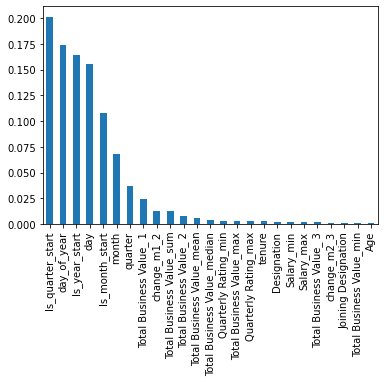

In [76]:
feature_imp.nlargest(25).plot(kind='bar')

In [77]:
X['Score']=clf.predict(X)

In [78]:
X['Score_Probs']=clf.predict_proba(X.drop(columns='Score'))[:,1]

In [79]:
X.head(10)

,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_median,Total Business Value_sum,Quarterly Rating_min,Quarterly Rating_max,Salary_min,Salary_max,Joining Designation,...,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Score,Score_Probs
0,-665480,2381060,571860.00000,0,1715580,2,2,57387,57387,1,...,0,0,0,0,0,0,0,1,1,1.00000
1,0,0,0.00000,0,0,1,1,67016,67016,2,...,0,0,1,0,0,0,0,1,0,0.00000
2,0,350000,70000.00000,0,350000,1,1,65603,65603,2,...,0,0,0,0,0,0,0,1,1,1.00000
3,0,120360,40120.00000,0,120360,1,1,46368,46368,1,...,0,0,0,0,1,0,1,0,1,1.00000
4,0,1265000,253000.00000,0,1265000,1,2,78728,78728,3,...,0,0,0,0,0,1,0,0,0,0.00000
5,0,0,0.00000,0,0,1,1,70656,70656,3,...,0,0,0,0,0,0,1,0,1,1.00000
6,0,0,0.00000,0,0,1,1,42172,42172,1,...,0,0,0,0,0,0,0,1,0,0.00000
7,0,1707180,434530.00000,200000,2607180,1,4,28116,28116,1,...,0,0,0,0,0,0,0,1,1,1.00000
8,0,1719680,444045.21739,258610,10213040,1,2,119227,119227,1,...,0,0,0,0,0,0,0,1,1,1.00000
9,0,0,0.00000,0,0,1,1,19734,19734,3,...,0,0,0,0,0,0,1,0,0,0.00000


In [80]:
concat_empid = pd.concat([df2_train[['Emp_ID']],X],axis=1)

In [81]:
concat_empid.shape

(2381, 67)

## **Test Data**

In [82]:
# Import test data
test = pd.read_csv("test.csv")

In [83]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [84]:
test.shape

(741, 1)

In [85]:
test_data= pd.merge(concat_empid,test,on='Emp_ID', how='inner')

In [86]:
test_data[test_data['Score']==1].head(25)

,Emp_ID,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_median,Total Business Value_sum,Quarterly Rating_min,Quarterly Rating_max,Salary_min,Salary_max,...,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Score,Score_Probs


In [87]:
test_data.shape

(741, 67)

# **Submission**

In [88]:
#Submission
final_sub = pd.DataFrame({"Emp_ID":test_data['Emp_ID'],'Target':test_data['Score']})

In [89]:
final_sub.tail()

,Emp_ID,Target
736,2775,0
737,2778,0
738,2781,0
739,2784,0
740,2788,0


In [90]:
final_sub.to_csv("submission_1.csv",index=False)